In Yugioh, what is the probability that the first card drawn is either a quick play spell card or a trap card? Assume that no other cards have been drawn, that there is 15 trap cards and 10 quick play spell cards in a deck of 60 cards.

The sample space I am observing includes all possible cards you could draw, one trial of the simulation would be drawing to cards and checking them. I am measuring the amount of times that a quick play spell card or a trap card is drawn

Number of simulations: 100000
Drew trap or quick play spell card: 41682 times (0.4168 or 41.68%)
Drew other card: 58318 times (0.5832 or 58.32%)


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


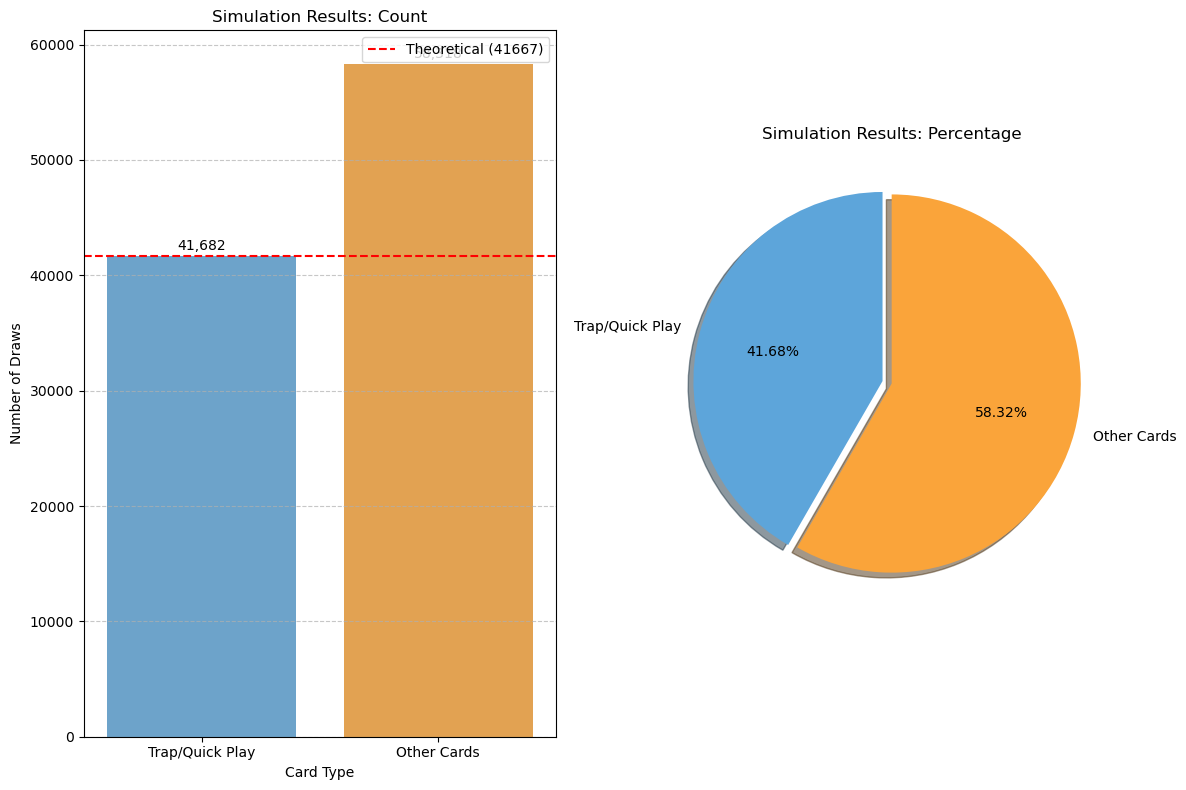

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the simulation parameters
np.random.seed(42)  # For reproducibility
num_simulations = 100000
deck_size = 60
trap_cards = 15
quick_play_cards = 10

# Run the simulation
results = []  # Store the results of each draw: 1 for success, 0 for failure

for _ in range(num_simulations):
    # Create a deck: 0 = regular card, 1 = trap card, 2 = quick play spell card
    deck = np.zeros(deck_size)
    deck[0:trap_cards] = 1  # First 15 cards are trap cards
    deck[trap_cards:trap_cards+quick_play_cards] = 2  # Next 10 cards are quick play spell cards
    
    # Shuffle the deck
    np.random.shuffle(deck)
    
    # Draw the first card
    first_card = deck[0]
    
    # Check if it's a trap card or quick play spell card
    if first_card == 1 or first_card == 2:
        results.append(1)  # Success
    else:
        results.append(0)  # Failure

# Calculate the counts and probabilities
success_count = sum(results)
failure_count = num_simulations - success_count
success_prob = success_count / num_simulations
failure_prob = failure_count / num_simulations

# Display results
print(f"Number of simulations: {num_simulations}")
print(f"Drew trap or quick play spell card: {success_count} times ({success_prob:.4f} or {success_prob*100:.2f}%)")
print(f"Drew other card: {failure_count} times ({failure_prob:.4f} or {failure_prob*100:.2f}%)")

# Create visualizations
plt.figure(figsize=(12, 8))

# 1. Bar chart showing counts
plt.subplot(1, 2, 1)
sns.barplot(x=['Trap/Quick Play', 'Other Cards'], y=[success_count, failure_count], palette=['#5DA5DA', '#FAA43A'])
plt.title('Simulation Results: Count')
plt.ylabel('Number of Draws')
plt.xlabel('Card Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on bars
for i, count in enumerate([success_count, failure_count]):
    plt.text(i, count + 500, f'{count:,}', ha='center')

# 2. Pie chart showing percentages
plt.subplot(1, 2, 2)
plt.pie([success_count, failure_count], 
        labels=['Trap/Quick Play', 'Other Cards'],
        autopct='%1.2f%%',
        colors=['#5DA5DA', '#FAA43A'],
        explode=(0.05, 0),
        shadow=True,
        startangle=90)
plt.title('Simulation Results: Percentage')

# Add a theoretical line to the bar chart
plt.subplot(1, 2, 1)
theoretical_success = (trap_cards + quick_play_cards) / deck_size * num_simulations
theoretical_failure = (1 - (trap_cards + quick_play_cards) / deck_size) * num_simulations
plt.axhline(y=theoretical_success, color='red', linestyle='--', label=f'Theoretical ({theoretical_success:.0f})')
plt.legend()

plt.tight_layout()
plt.show()

Number of simulations: 100000

Empirical Results:
Drew trap or quick play spell card: 41682 times (0.4168 or 41.68%)
Drew other card: 58318 times (0.5832 or 58.32%)

Theoretical Results:
Expected trap or quick play spell card: 41667 times (0.4167 or 41.67%)
Expected other card: 58333 times (0.5833 or 58.33%)


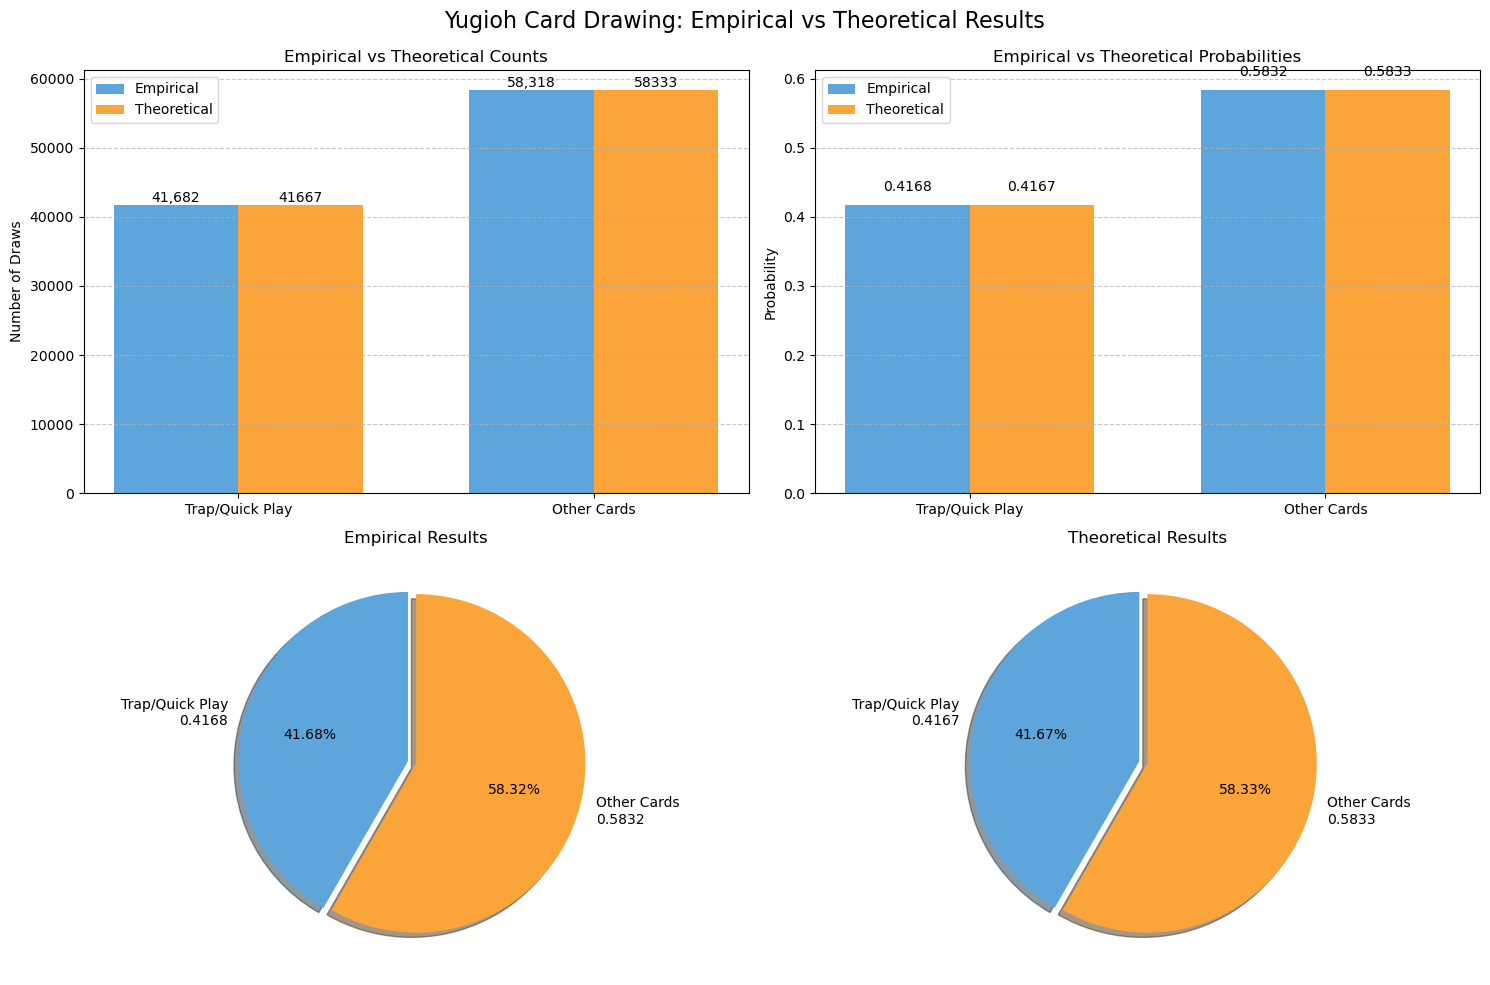


Difference between empirical and theoretical probability: 0.000153 (0.0153%)
95% Confidence Interval for empirical probability: [0.413764, 0.419876]
Theoretical probability 0.416667 is within the 95% confidence interval


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

# Set up the simulation parameters
np.random.seed(42)  # For reproducibility
num_simulations = 100000
deck_size = 60
trap_cards = 15
quick_play_cards = 10

# Calculate theoretical probabilities
target_cards = trap_cards + quick_play_cards
p_success = target_cards / deck_size
p_failure = 1 - p_success

theoretical_success_count = num_simulations * p_success
theoretical_failure_count = num_simulations * p_failure

# Run the simulation
results = []  # Store the results of each draw: 1 for success, 0 for failure

for _ in range(num_simulations):
    # Create a deck: 0 = regular card, 1 = trap card, 2 = quick play spell card
    deck = np.zeros(deck_size)
    deck[0:trap_cards] = 1  # First 15 cards are trap cards
    deck[trap_cards:trap_cards+quick_play_cards] = 2  # Next 10 cards are quick play spell cards
    
    # Shuffle the deck
    np.random.shuffle(deck)
    
    # Draw the first card
    first_card = deck[0]
    
    # Check if it's a trap card or quick play spell card
    if first_card == 1 or first_card == 2:
        results.append(1)  # Success
    else:
        results.append(0)  # Failure

# Calculate the empirical counts and probabilities
empirical_success_count = sum(results)
empirical_failure_count = num_simulations - empirical_success_count
empirical_success_prob = empirical_success_count / num_simulations
empirical_failure_prob = empirical_failure_count / num_simulations

# Display numerical results
print(f"Number of simulations: {num_simulations}")
print("\nEmpirical Results:")
print(f"Drew trap or quick play spell card: {empirical_success_count} times ({empirical_success_prob:.4f} or {empirical_success_prob*100:.2f}%)")
print(f"Drew other card: {empirical_failure_count} times ({empirical_failure_prob:.4f} or {empirical_failure_prob*100:.2f}%)")

print("\nTheoretical Results:")
print(f"Expected trap or quick play spell card: {theoretical_success_count:.0f} times ({p_success:.4f} or {p_success*100:.2f}%)")
print(f"Expected other card: {theoretical_failure_count:.0f} times ({p_failure:.4f} or {p_failure*100:.2f}%)")

# Create visualizations
plt.figure(figsize=(15, 10))

# 1. Bar chart comparing empirical vs theoretical counts
plt.subplot(2, 2, 1)
categories = ['Trap/Quick Play', 'Other Cards']
empirical_counts = [empirical_success_count, empirical_failure_count]
theoretical_counts = [theoretical_success_count, theoretical_failure_count]

x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, empirical_counts, width, label='Empirical', color='#5DA5DA')
plt.bar(x + width/2, theoretical_counts, width, label='Theoretical', color='#FAA43A')

plt.ylabel('Number of Draws')
plt.title('Empirical vs Theoretical Counts')
plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on bars
for i, count in enumerate(empirical_counts):
    plt.text(i - width/2, count + 500, f'{count:,}', ha='center')
for i, count in enumerate(theoretical_counts):
    plt.text(i + width/2, count + 500, f'{count:.0f}', ha='center')

# 2. Bar chart comparing empirical vs theoretical probabilities
plt.subplot(2, 2, 2)
empirical_probs = [empirical_success_prob, empirical_failure_prob]
theoretical_probs = [p_success, p_failure]

plt.bar(x - width/2, empirical_probs, width, label='Empirical', color='#5DA5DA')
plt.bar(x + width/2, theoretical_probs, width, label='Theoretical', color='#FAA43A')

plt.ylabel('Probability')
plt.title('Empirical vs Theoretical Probabilities')
plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add probability labels on bars
for i, prob in enumerate(empirical_probs):
    plt.text(i - width/2, prob + 0.02, f'{prob:.4f}', ha='center')
for i, prob in enumerate(theoretical_probs):
    plt.text(i + width/2, prob + 0.02, f'{prob:.4f}', ha='center')

# 3. Pie chart comparing empirical results
plt.subplot(2, 2, 3)
plt.pie(empirical_counts, 
        labels=[f'Trap/Quick Play\n{empirical_success_prob:.4f}', f'Other Cards\n{empirical_failure_prob:.4f}'],
        autopct='%1.2f%%',
        colors=['#5DA5DA', '#FAA43A'],
        explode=(0.05, 0),
        shadow=True,
        startangle=90)
plt.title('Empirical Results')

# 4. Pie chart showing theoretical probabilities
plt.subplot(2, 2, 4)
plt.pie(theoretical_counts, 
        labels=[f'Trap/Quick Play\n{p_success:.4f}', f'Other Cards\n{p_failure:.4f}'],
        autopct='%1.2f%%',
        colors=['#5DA5DA', '#FAA43A'],
        explode=(0.05, 0),
        shadow=True,
        startangle=90)
plt.title('Theoretical Results')

plt.suptitle('Yugioh Card Drawing: Empirical vs Theoretical Results', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Calculate the difference between empirical and theoretical results
diff_success = abs(empirical_success_prob - p_success)
print(f"\nDifference between empirical and theoretical probability: {diff_success:.6f} ({diff_success*100:.4f}%)")

# Calculate 95% confidence interval for the empirical probability
from scipy.stats import norm
z = 1.96  # 95% confidence level
margin_of_error = z * np.sqrt((empirical_success_prob * (1 - empirical_success_prob)) / num_simulations)
ci_lower = empirical_success_prob - margin_of_error
ci_upper = empirical_success_prob + margin_of_error

print(f"95% Confidence Interval for empirical probability: [{ci_lower:.6f}, {ci_upper:.6f}]")
print(f"Theoretical probability {p_success:.6f} is {'within' if ci_lower <= p_success <= ci_upper else 'outside'} the 95% confidence interval")

The empirical probability is 41.68%, while the theoretical probability is 41.67%